In [14]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [15, 9]
import math
import numpy as np

In [2]:
import config

{'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'time': {'end': 'Mar 13 00:00:00 -0500 2018',
                   'start': 'Mar 12 00:00:00 -0500 2018'}},
 'path': {'cwd': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy',
          'friends_dictionary': '/Users/lzhou/git/github/uclresearchanalysis/other/friends_dictionary.dat',
          'pickle': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle',
          'processed_dataframe': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/pickle/final_processed_data.dat',
          'result': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/result',
          'twitter': '/Users/lzhou/git/github/uclresearchanalysis/data/givenchy/twitter'}}


In [3]:
from config import load_result_dataframe
df = load_result_dataframe()

'Loading processed dataframe'
'Loaded 4754 entries'


In [4]:
df.head()

,user,user_id,created_at,source_type,source_user,source_user_id,seed_user,seed_user_id,followers_count,friends_count,text,location,country_code,long,latt,state,mentions,generation,minutes
0,davelackie,100766356,2018-03-12 08:20:58-05:00,OR,,,davelackie,100766356,143119,4643,So sad to hear that fashion designer Hubert de...,Canada,,NaN,NaN,,[],1,0.00
1,alexanderskhan,3186545203,2018-03-12 08:21:07-05:00,RT,davelackie,100766356,davelackie,100766356,753,3428,RT @davelackie: So sad to hear that fashion de...,"New Orleans, LA",,NaN,NaN,Louisiana,[davelackie],2,0.15
2,consiglierela,4134992843,2018-03-12 08:21:12-05:00,RT,davelackie,100766356,davelackie,100766356,2161,396,RT @davelackie: So sad to hear that fashion de...,⭐,,NaN,NaN,,[davelackie],2,0.23
3,ImpactPrincess,1955472014,2018-03-12 08:21:36-05:00,RT,davelackie,100766356,davelackie,100766356,242,642,RT @davelackie: So sad to hear that fashion de...,"David Jones, Probably",,NaN,NaN,,[davelackie],2,0.63
4,Damek0Masca,406301175,2018-03-12 08:22:06-05:00,OR,,,Damek0Masca,406301175,116,239,Today we mourn the death of a #fashion legend;...,New York,,NaN,NaN,New York,[],1,1.13


In [5]:
network_dataframe = df.filter(items=['minutes', 'user_id', 'seed_user_id', 'generation'])
network_dataframe.head()

,minutes,user_id,seed_user_id,generation
0,0.00,100766356,100766356,1
1,0.15,3186545203,100766356,2
2,0.23,4134992843,100766356,2
3,0.63,1955472014,100766356,2
4,1.13,406301175,406301175,1


In [6]:
n_bins = math.floor(max(df['minutes'])/10)
duration = n_bins*10

/Users/lzhou/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


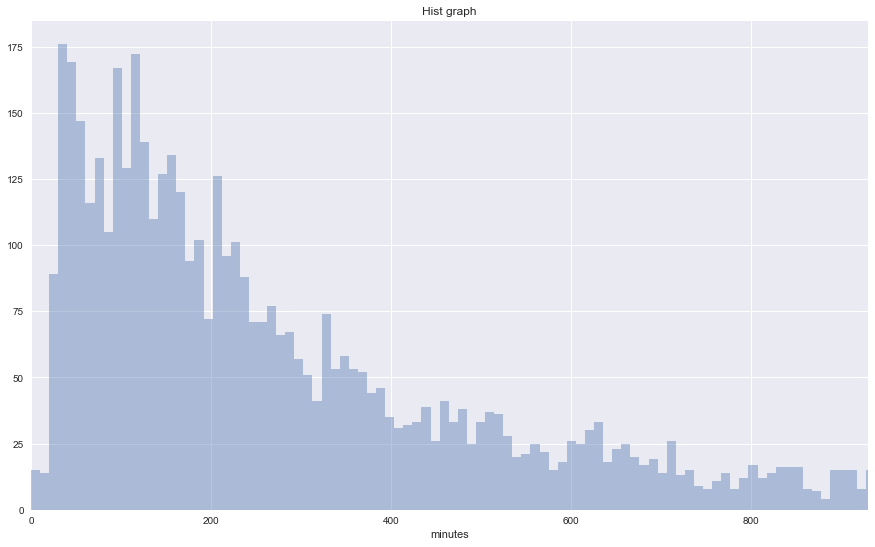

In [23]:
sns.distplot(df['minutes'], kde=False, bins=n_bins).set(xlim=(0, duration))
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Hist'))
plt.title('Hist graph')
plt.show()

In [8]:
df.head()

,user,user_id,created_at,source_type,source_user,source_user_id,seed_user,seed_user_id,followers_count,friends_count,text,location,country_code,long,latt,state,mentions,generation,minutes
0,davelackie,100766356,2018-03-12 08:20:58-05:00,OR,,,davelackie,100766356,143119,4643,So sad to hear that fashion designer Hubert de...,Canada,,NaN,NaN,,[],1,0.00
1,alexanderskhan,3186545203,2018-03-12 08:21:07-05:00,RT,davelackie,100766356,davelackie,100766356,753,3428,RT @davelackie: So sad to hear that fashion de...,"New Orleans, LA",,NaN,NaN,Louisiana,[davelackie],2,0.15
2,consiglierela,4134992843,2018-03-12 08:21:12-05:00,RT,davelackie,100766356,davelackie,100766356,2161,396,RT @davelackie: So sad to hear that fashion de...,⭐,,NaN,NaN,,[davelackie],2,0.23
3,ImpactPrincess,1955472014,2018-03-12 08:21:36-05:00,RT,davelackie,100766356,davelackie,100766356,242,642,RT @davelackie: So sad to hear that fashion de...,"David Jones, Probably",,NaN,NaN,,[davelackie],2,0.63
4,Damek0Masca,406301175,2018-03-12 08:22:06-05:00,OR,,,Damek0Masca,406301175,116,239,Today we mourn the death of a #fashion legend;...,New York,,NaN,NaN,New York,[],1,1.13


/Users/lzhou/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/lzhou/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


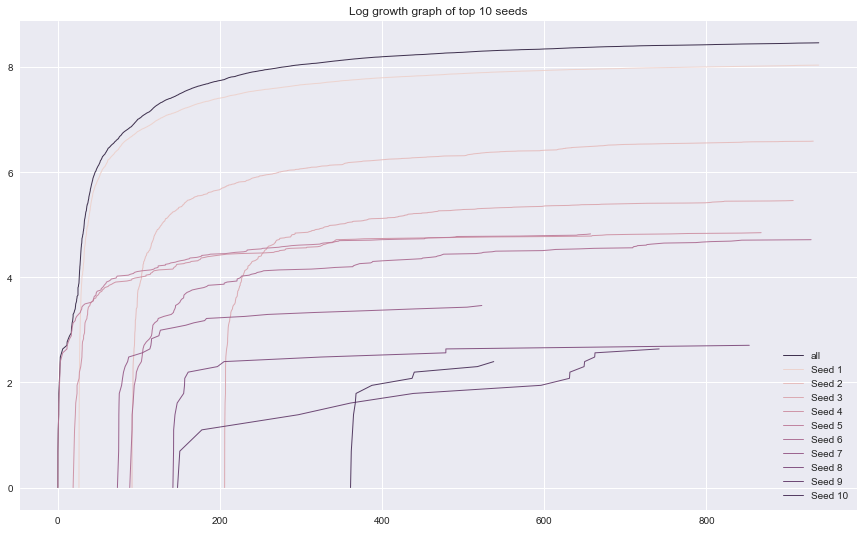

In [16]:
number_of_seeds = 10
seed_count_series = network_dataframe.seed_user_id.value_counts()
pallttes = sns.cubehelix_palette(number_of_seeds + 1)

draw_dataframe = df.filter(items=['minutes'])
draw_dataframe = draw_dataframe.reset_index()
draw_dataframe['counter'] = np.log(range(len(draw_dataframe)))
plt.plot(draw_dataframe['minutes'], draw_dataframe['counter'], marker='', color=pallttes[number_of_seeds], linewidth=1, alpha=0.9, label = 'all')

for index in range(number_of_seeds):
    seed_user_id = seed_count_series.keys()[index]
    data_to_plot = network_dataframe[network_dataframe.seed_user_id == seed_user_id]['minutes']
    data_to_plot = data_to_plot.reset_index()
    data_to_plot['counter'] = np.log(range(len(data_to_plot)))
    plt.plot(data_to_plot['minutes'], data_to_plot['counter'], marker='', color=pallttes[index], linewidth=1, alpha=0.9, label='Seed {}'.format(index + 1))

plt.title("Log growth graph of top 10 seeds")
plt.legend()
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Log growth graph of top 10 seeds'))
plt.show()

/Users/lzhou/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


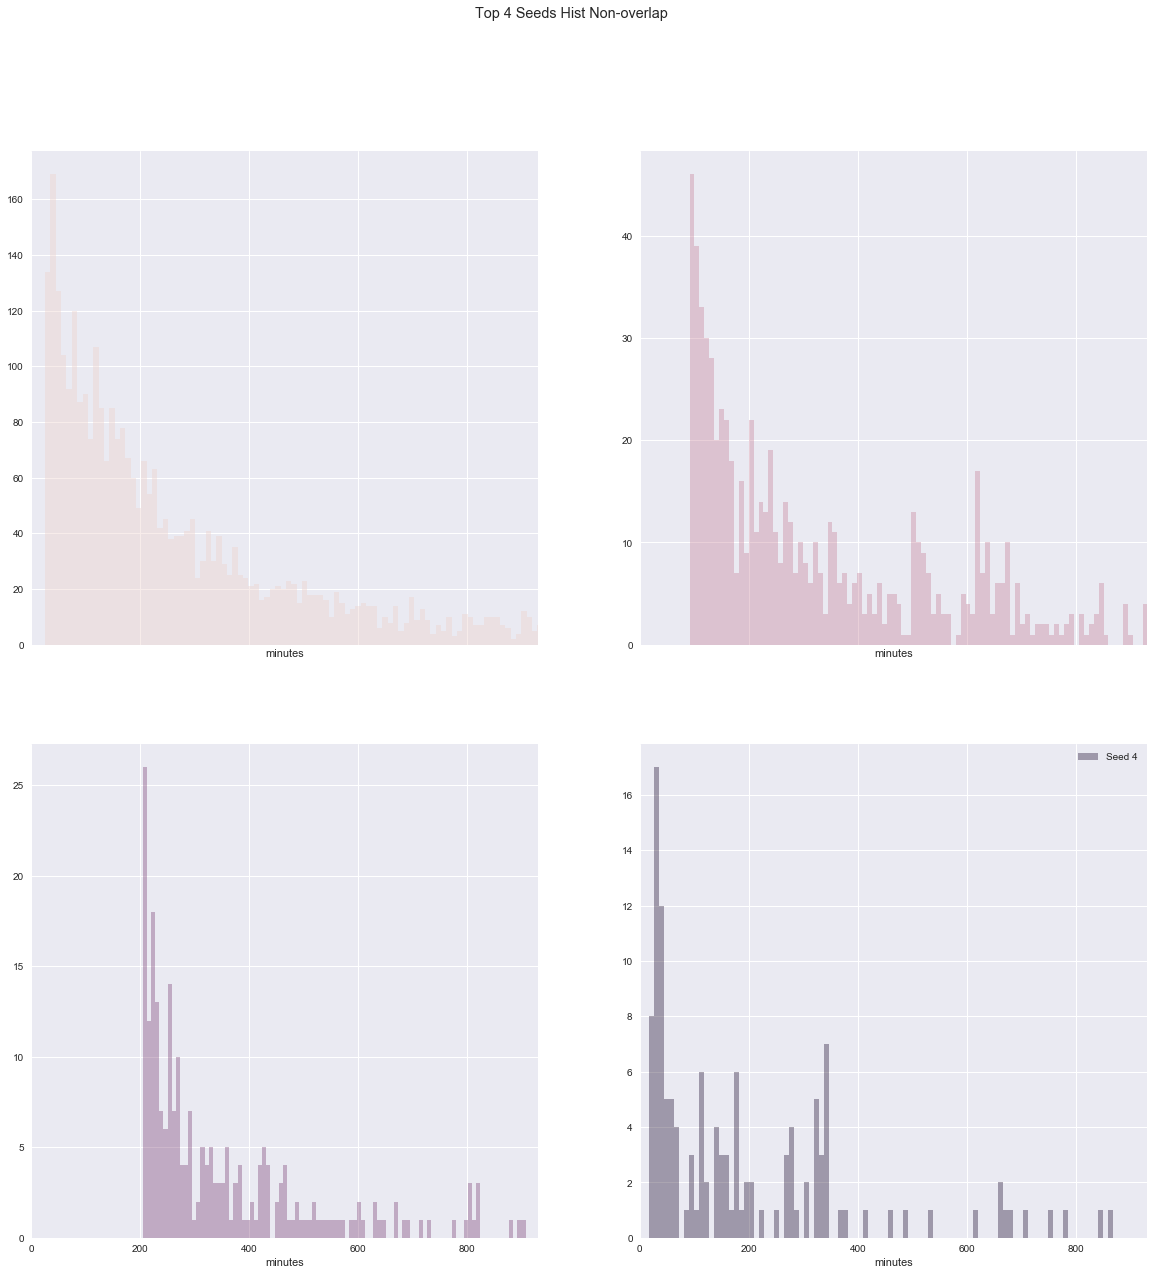

In [19]:
number_of_seeds = 4
seed_count_series = network_dataframe.seed_user_id.value_counts()
pallttes = sns.cubehelix_palette(number_of_seeds)

f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)
axes_list = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
for index in range(number_of_seeds):
    seed_user_id = seed_count_series.keys()[index]
    data_to_plot = network_dataframe[network_dataframe.seed_user_id == seed_user_id]['minutes']
    sns.distplot(data_to_plot, color=pallttes[index], label='Seed {}'.format(index + 1), kde=False, bins=n_bins, ax = axes_list[index]).set(xlim=(0, duration))
plt.legend()
plt.suptitle('Top 4 Seeds Hist Non-overlap')
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Top 4 Seeds Hist Non-overlap'))
plt.show()

/Users/lzhou/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


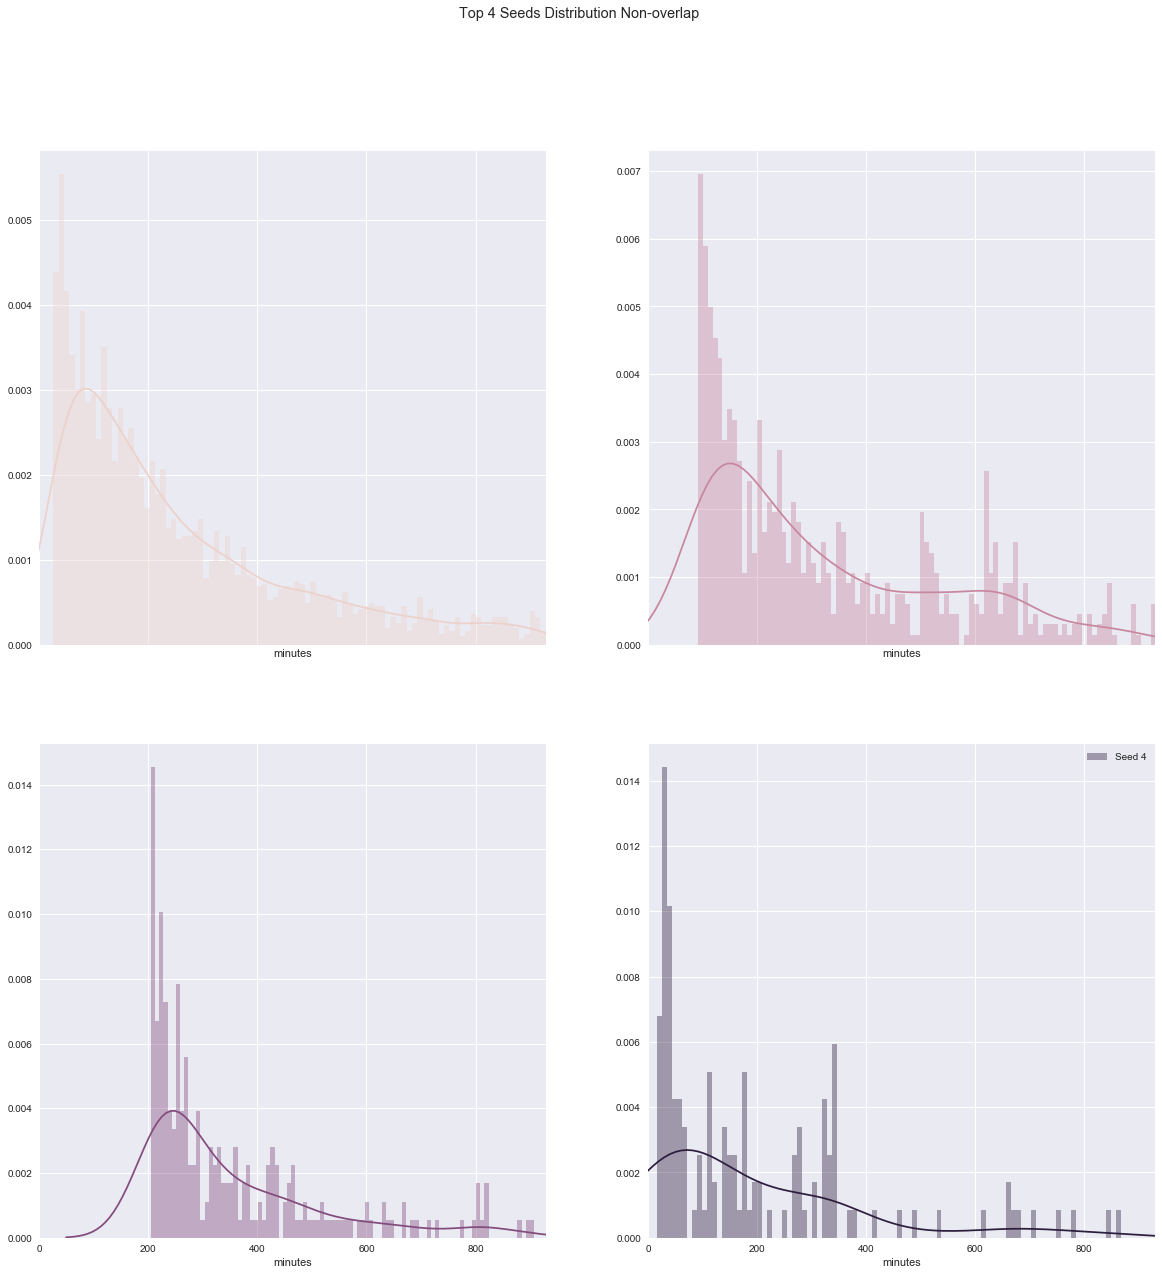

In [20]:
number_of_seeds = 4
seed_count_series = network_dataframe.seed_user_id.value_counts()
pallttes = sns.cubehelix_palette(number_of_seeds)

f, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)
axes_list = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
for index in range(number_of_seeds):
    seed_user_id = seed_count_series.keys()[index]
    data_to_plot = network_dataframe[network_dataframe.seed_user_id == seed_user_id]['minutes']
    sns.distplot(data_to_plot, color=pallttes[index], label='Seed {}'.format(index + 1), bins=n_bins, ax = axes_list[index]).set(xlim=(0, duration))
plt.legend()
plt.suptitle('Top 4 Seeds Distribution Non-overlap')
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Top 4 Seeds Distribution Non-overlap'))
plt.show()

/Users/lzhou/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


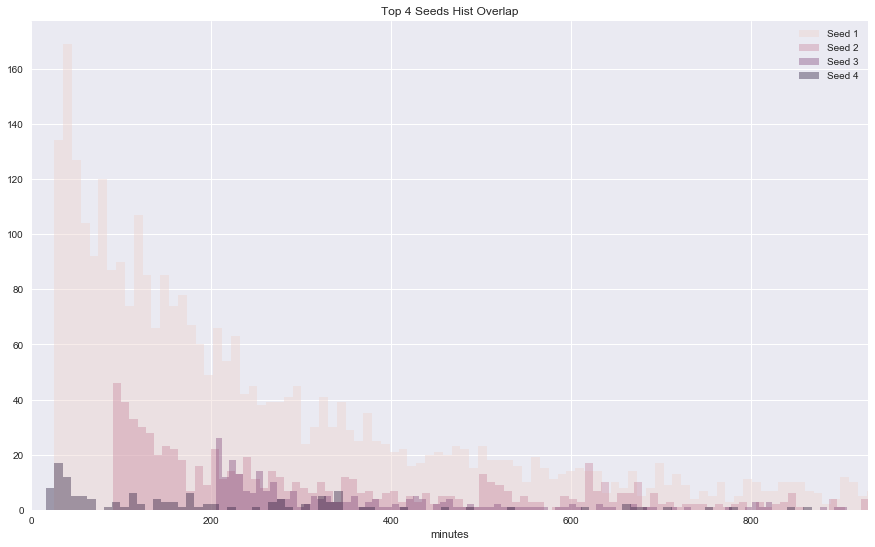

In [21]:
number_of_seeds = 4
seed_count_series = network_dataframe.seed_user_id.value_counts()
pallttes = sns.cubehelix_palette(number_of_seeds)
for index in range(number_of_seeds):
    seed_user_id = seed_count_series.keys()[index]
    data_to_plot = network_dataframe[network_dataframe.seed_user_id == seed_user_id]['minutes']
    sns.distplot(data_to_plot, color=pallttes[index], label='Seed {}'.format(index + 1), kde=False, bins=n_bins).set(xlim=(0, duration))
plt.legend()
plt.title('Top 4 Seeds Hist Overlap')
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Top 4 Seeds Hist Overlap'))
plt.show()

/Users/lzhou/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lzhou/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


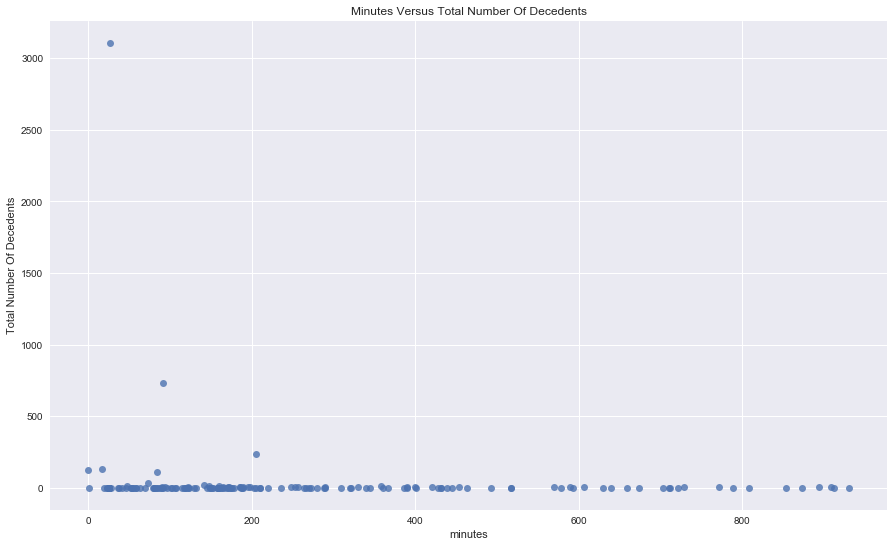

In [22]:
seed_count_series = network_dataframe.seed_user_id.value_counts()
seeds_dataframe = network_dataframe[network_dataframe.user_id.isin(seed_count_series.keys())]
seeds_dataframe['Total Number Of Decedents'] = 0
for index, row in seeds_dataframe.iterrows():
    seeds_dataframe.loc[index, 'Total Number Of Decedents'] = seed_count_series.get(seeds_dataframe.loc[index, 'user_id'] )
seeds_dataframe.head()

# use the function regplot to make a scatterplot
sns.regplot(x=seeds_dataframe["minutes"], y=seeds_dataframe["Total Number Of Decedents"], fit_reg=False)
plt.title('Minutes Versus Total Number Of Decedents')
plt.savefig('{}/{}'.format(config.settings['path']['result'], 'Minutes Versus Total Number Of Decedents'))
plt.show()
